In [7]:
from google.colab import drive
drive.mount('/content/drive')

#Librerias
import pandas as pd
import matplotlib.pyplot as plt

#subir archivo de datos y revisar carga
ruta = '/content/drive/MyDrive/DataSet/retail_sales_dataset_limpio.csv'
df = pd.read_csv(ruta)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,BEAUTY,3,50,150
1,2,2023-02-27,CUST002,Female,26,CLOTHING,2,500,1000
2,3,2023-01-13,CUST003,Male,50,ELECTRONICS,1,30,30
3,4,2023-05-21,CUST004,Male,37,CLOTHING,1,500,500
4,5,2023-05-06,CUST005,Male,30,BEAUTY,2,50,100
5,6,2023-04-25,CUST006,Female,45,BEAUTY,1,30,30
6,7,2023-03-13,CUST007,Male,46,CLOTHING,2,25,50
7,8,2023-02-22,CUST008,Male,30,ELECTRONICS,4,25,100
8,9,2023-12-13,CUST009,Male,63,ELECTRONICS,2,300,600
9,10,2023-10-07,CUST010,Female,52,CLOTHING,4,50,200


In [10]:
#analisis inicial
#para siguiente ejercicio se ocupo la exportacion c.sv del archivo retail_sales_dataset original, pero procesado con la limpieza y formateo anterior

#tipos de datos
print(df.dtypes)

#estadísticas descriptivas
print(df.describe())

#distribución de variables categóricas
print(df['Gender'].value_counts())
print(df['Product Category'].value_counts())

#valores únicos por columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

#total vendido por categoría
print(df.groupby('Product Category')['Total Amount'].sum())

#promedio vendido por categoría
print(df.groupby('Product Category')['Total Amount'].mean())

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000
Gender
Female    510
Male      490
Name: count, dt

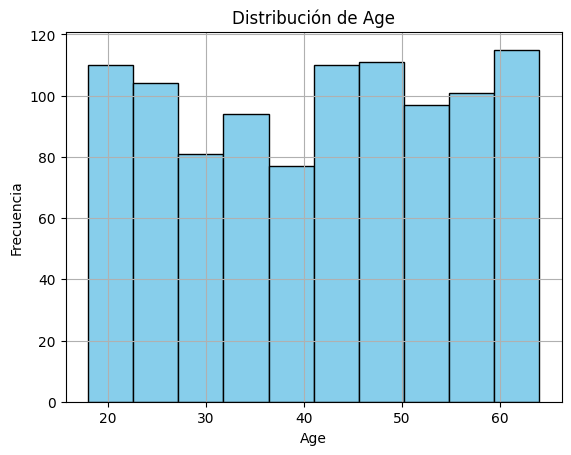

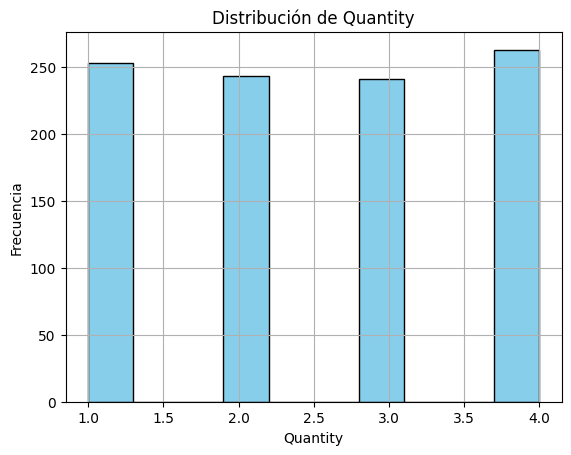

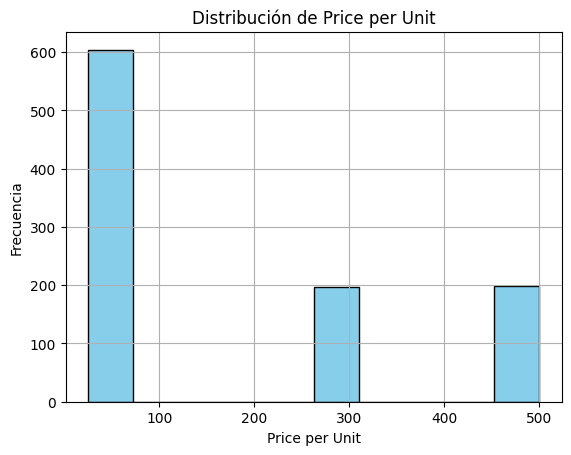

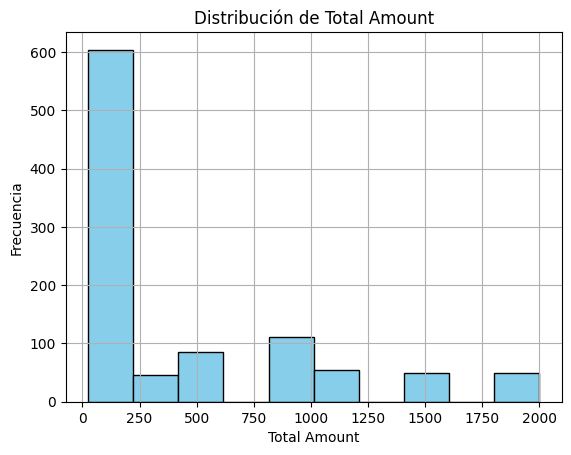

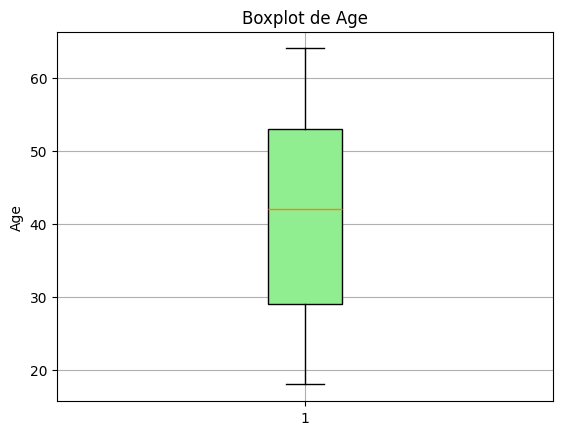

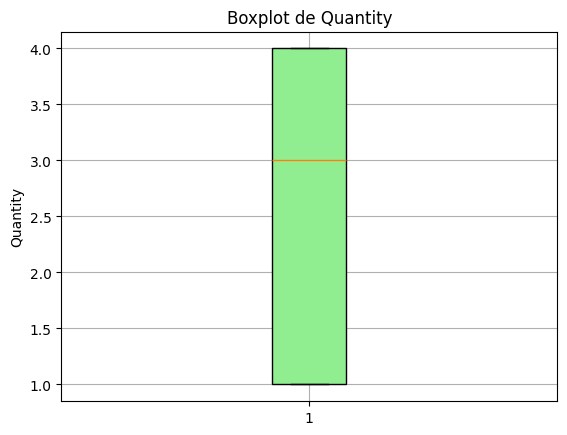

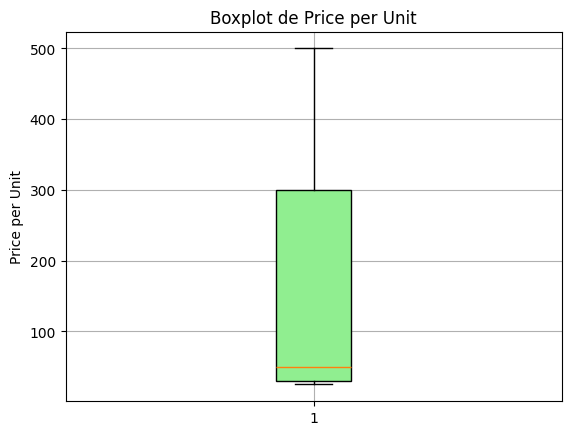

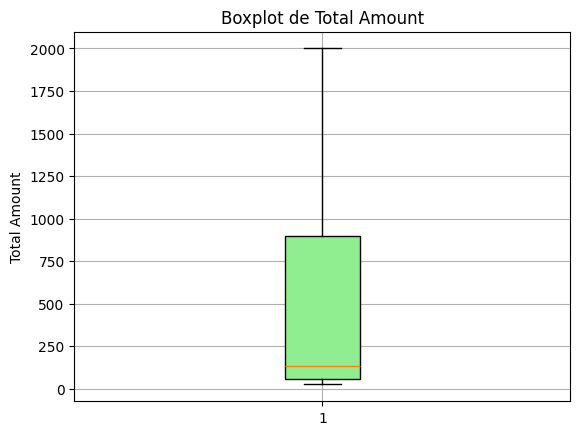

In [11]:
#lista de variables numéricas
variables = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

#recorrer variables y generar histogramas
for var in variables:
    plt.hist(df[var], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

#crear boxplots
for var in variables:
    plt.boxplot(df[var], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

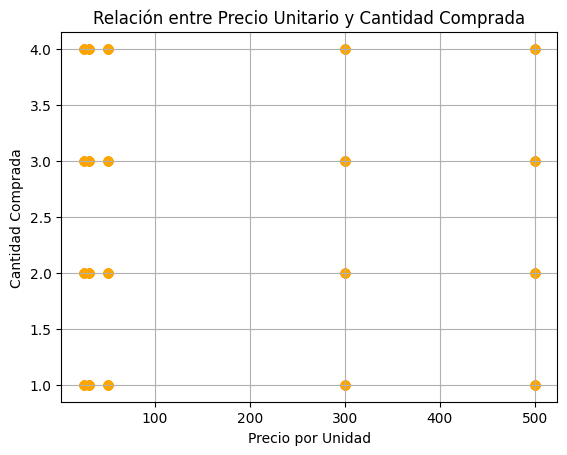

In [12]:
#grafico dispersion: Relación entre Precio por Unidad y Cantidad Comprada
plt.scatter(df['Price per Unit'], df['Quantity'], alpha=0.7, color='orange')
plt.title("Relación entre Precio Unitario y Cantidad Comprada")
plt.xlabel("Precio por Unidad")
plt.ylabel("Cantidad Comprada")
plt.grid(True)
plt.show()

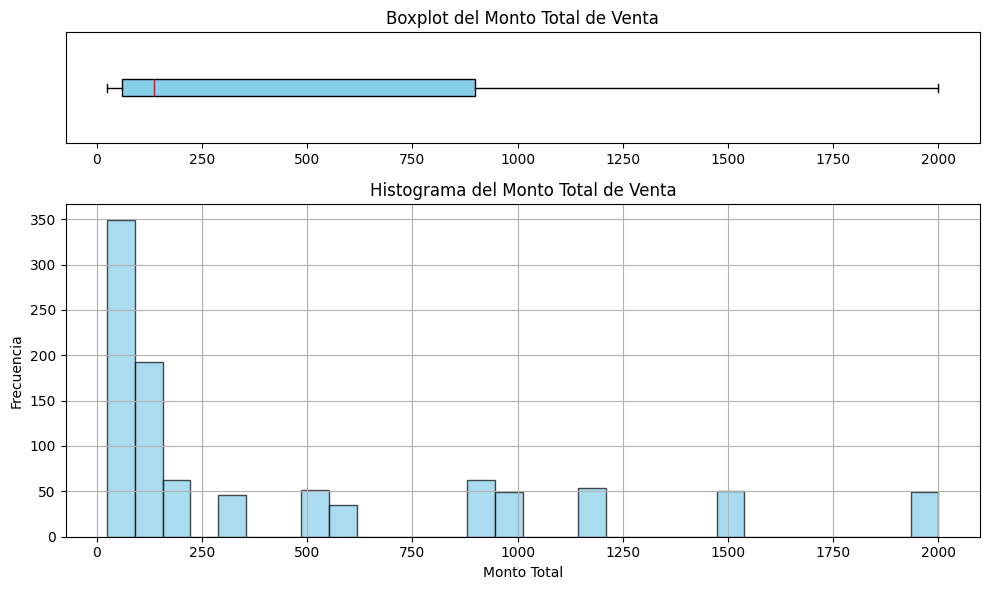

In [13]:
import matplotlib.pyplot as plt

#crear figura con subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 6), height_ratios=[1, 3])

# Boxplot
axs[0].boxplot(df['Total Amount'], vert=False, patch_artist=True,
               boxprops=dict(facecolor='skyblue', color='black'),
               medianprops=dict(color='red'))
axs[0].set_title("Boxplot del Monto Total de Venta")
axs[0].set_yticks([])

#histograma
axs[1].hist(df['Total Amount'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axs[1].set_title("Histograma del Monto Total de Venta")
axs[1].set_xlabel("Monto Total")
axs[1].set_ylabel("Frecuencia")
axs[1].grid(True)

plt.tight_layout()
plt.show()

#-el histograma muestra cómo se distribuyen los montos totales de venta, con la mayoría concentrados en valores bajos.
#-el boxplot permite detectar fácilmente valores atípicos que podrían representar compras inusualmente grandes.